In [120]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [121]:
df = pd.read_csv('temperature_37years.csv', index_col='timestamp', parse_dates=True)['Basel Temperature [2 m elevation corrected]'].to_frame()
df.head()

,Basel Temperature [2 m elevation corrected]
timestamp,
1985-01-01 00:00:00,-3.294971
1985-01-01 01:00:00,-3.274971
1985-01-01 02:00:00,0.355029
1985-01-01 03:00:00,0.365029
1985-01-01 04:00:00,0.415029


<AxesSubplot: xlabel='timestamp'>

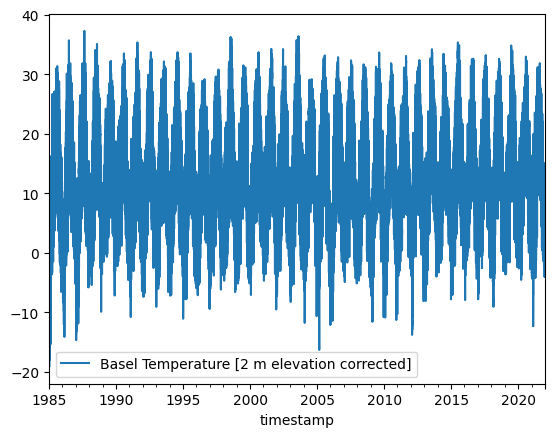

In [122]:
df.plot()

<AxesSubplot: xlabel='timestamp'>

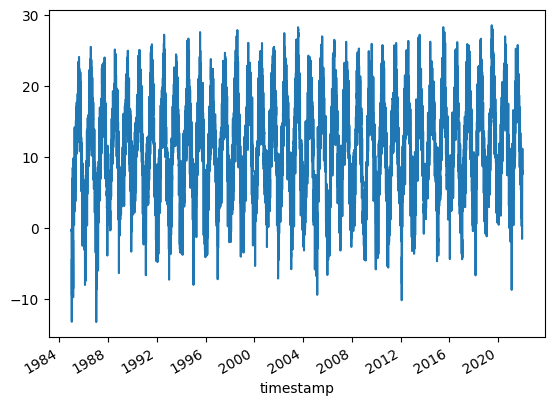

In [123]:
df['Daily SMA'] = df['Basel Temperature [2 m elevation corrected]'].rolling(24).mean().shift(-11)
daily_moving_avg = df['Daily SMA'][12::24]
daily_moving_avg.plot()

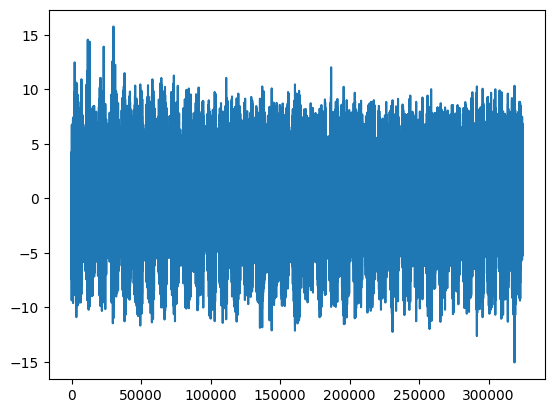

In [124]:
daily_variation = []
for i in range(len(df['Basel Temperature [2 m elevation corrected]'])):
    daily_variation.append(df['Basel Temperature [2 m elevation corrected]'][i] - daily_moving_avg[int(i / 24)])

plt.plot(daily_variation)

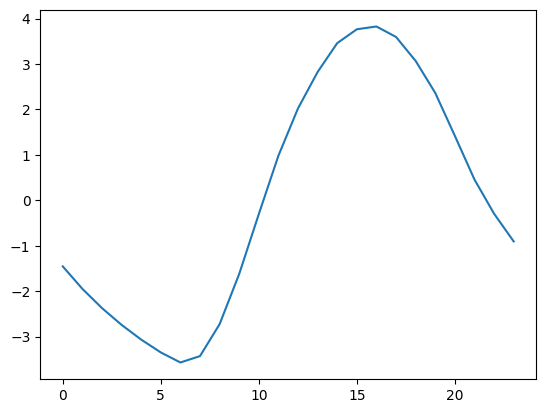

In [125]:
mean_daily_variation = np.zeros(24)
for i in range(len(daily_moving_avg)):
    day = 24 * i
    for hour in range(24):
        mean_daily_variation[hour] += df['Basel Temperature [2 m elevation corrected]'][day+hour] - daily_moving_avg[i]
mean_daily_variation /= len(daily_moving_avg)

plt.plot(mean_daily_variation)

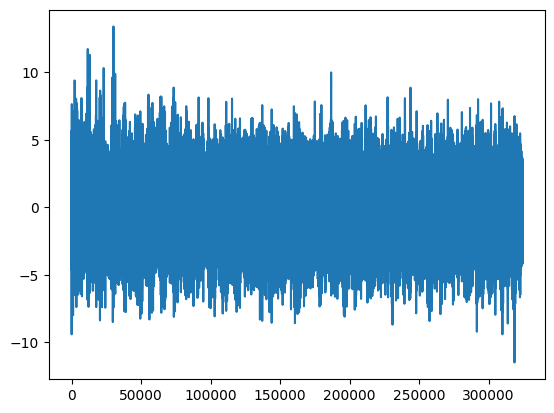

In [126]:
noise = []
for hour in range(len(daily_variation)):
    noise.append(daily_variation[hour] - mean_daily_variation[hour % 24])
plt.plot(noise)